In [3]:
import numpy as np
from random import seed
import copy, random
import time
global textvar
global holdtime
holdtime=[]

def logging_time(original_fn): # timer function
    def wrapper_fn(*args, **kwargs):
        start_time = time.time() # start time
        result = original_fn(*args, **kwargs)
        elapsed_time = (time.time() - start_time) * 1e3 #  estimated time in [ms]
        holdtime.append(elapsed_time)
        print("WorkingTime[{}]: {:.5f} ms".format(original_fn.__name__, elapsed_time))
        return result
    return wrapper_fn


# assume that r-p+1 <= g
def findMedian(a, p, r): # helper function to find the median as the med-element of even-lengthed array
    L = []
    for i in range(p, r+1):
        L.append(a[i])
    L.sort()
    return L[(r-p+1)//2]

def _partition(a, p, r, x):  # the partion function of linear time median
    
    # we should find out  index i value in the a[p..r]
    # swap a[i], a[r] in order to make a[r] as a pivot 
    for i in range(p, r+1): 
        if a[i] == x: 
            a[i], a[r] = a[r], a[i]
            break
    
    i = p - 1
    for j in range(p, r):
        if a[j] <= a[r]:
            i += 1 
            a[i], a[j] = a[j], a[i]
    a[i+1], a[r] = a[r], a[i+1]
    return i+1

@logging_time
def QuickSelectMedians(a, p, r, k):
    return KthSmallest(a, p, r, k)
    
def KthSmallest(a, p, r, k):
    # divide A into floor(n/g) groups
    # create median array with size floor(n/g)
    n = r - p + 1
    median = []
    i = 0
    #the g variable represent the number of groups
    while i < n//g:
        # g element can be assigned for each group
        median.append(findMedian(a, p+g*i, p+g*i+4))
        i += 1
    # if last group has n%g (remainder) elements
    if i*g < n:
        median.append(findMedian(a, p+g*i, p+g*i+(n%g-1)))
        i += 1
    # so, at this time i value means floor(n/g)
    if i == 1:
        # if median has only one elements,  should be median[0]
        medOfmed = median[i-1]
    else:
        # reculsively  can be found. 
        # Because median array is generated each recursion, i value should be shrunk more and more 
        medOfmed = KthSmallest(median, 0, i-1, i//2)
    
    # at this bottom line, medOfmed can be determined 
    # if we use the pivot as medofmed value, the number of sorted elements can be 3(floor(n/g)/2 - 2)
    q = _partition(a, p, r, medOfmed)
    # i value means medOfmed's rank in a[...] array 
    i = q - p + 1 
    if i == k:
        # if partitioned pivot is the kth Smallest element
        return a[q]
    elif i > k:
        return KthSmallest(a, p, q-1, k)
    else:
        return KthSmallest(a, q+1, r, k-i)

######################################### the gui 
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
listofK=[] # to stor the values of k
listofG=[] # to stor the values os selected groups
a = list(np.random.randint(-1000, 1000, size=100000)) # generate a list of numbers
def test(): # get the user input
    n=ent2.get()
    k=ent1.get()
    listofK.append(k)
    global g
    g=ent3.get()
    listofG.append(g)
    test = copy.deepcopy(a[0:n])
    ans2 = QuickSelectMedians(test, 0, n-1, k) # call the function to get the median
    textvar.set("WorkingTime {:.2f}".format(holdtime[-1]))
    
def draw(): # to draw the execution resultes
    if var.get()==1: # 1 for K values
        figure2 = plt.Figure(figsize=(5,4), dpi=100)
        ax2 = figure2.add_subplot(111)
        line2 = FigureCanvasTkAgg(figure2, r2)
        line2.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
        df1= pd.DataFrame(np.column_stack([listofK, holdtime]), 
                               columns=['K values', 'time',]).groupby('K values').max()
        df1.plot(kind='line', legend=True, ax=ax2, color='r',marker='o', fontsize=10)
    elif var.get()==2: # 2 for group values
        figure3 = plt.Figure(figsize=(5,4), dpi=100)
        ax3 = figure3.add_subplot(111)
        line3 = FigureCanvasTkAgg(figure3, r2)
        line3.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
        df3= pd.DataFrame(np.column_stack([listofG, holdtime]), 
                               columns=['group values', 'time',]).groupby('group values').max()
        df3.plot(kind='line', legend=True, ax=ax3, color='r',marker='o', fontsize=10)
        
def generateGraph(): # to show options in tkinter TopLevel frame
    global r2
    r2=tk.Toplevel(root)
    global var
    var = tk.IntVar()
    R1 = tk.Radiobutton(r2, text="for K values", variable=var, value=1,
                      command=draw)
    R1.pack( anchor = tk.W )

    R2 = tk.Radiobutton(r2, text="for groubs", variable=var, value=2,
                      command=draw)
    R2.pack( anchor =tk.W )
    
    #الواجهة 
root=tk.Tk() # main frame
root.title("linear-time median finding")
root.geometry("500x450")
input_frame= tk.LabelFrame(root,text="inputs ",font=(20))
input_frame.pack(side=tk.TOP,fill="both")
l1= tk.Label(input_frame,text="input k ",font=(20)).grid(row=0,column=0,padx=50,pady=20)
ent1=tk.IntVar()
e1=tk.Entry(input_frame,textvariable=ent1).grid(row=0,column=1)

l2= tk.Label(input_frame,text="input size ",font=(20)).grid(row=1,column=0,padx=50,pady=20)
ent2=tk.IntVar()
e2=tk.Entry(input_frame,textvariable=ent2).grid(row=1,column=1)

l3= tk.Label(input_frame,text="input groubs ",font=(20)).grid(row=2,column=0,padx=50,pady=20)
ent3=tk.IntVar()
e3=tk.Entry(input_frame,textvariable=ent3).grid(row=2,column=1)
get_input= tk.Button(root,text="get input ",font=(20),command=test).pack(pady=20)

test_b=tk.Button(root,text="generate graph",font=(20),command=generateGraph,).pack(pady=20)
res_frame=tk.LabelFrame(root,text="results ",font=(20))
res_frame.pack(fil=tk.BOTH)

textvar= tk.StringVar()

labelvar= tk.Label(res_frame,textvariable=textvar,font=(16)).pack(pady=20)

root.mainloop()
    

2022-05-13 01:58:33.760 python[1546:42726] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


WorkingTime[QuickSelectMedians]: 7.10082 ms
WorkingTime[QuickSelectMedians]: 10.23507 ms
WorkingTime[QuickSelectMedians]: 5.77307 ms
WorkingTime[QuickSelectMedians]: 5.45692 ms


In [ ]:
@logging_time
def QuickSelectRandom(a, p, r, k):
    """ call randomized quick select algorithm """
    return QuickSelect(a, p, r, k)

def QuickSelect(a, p, r, k):
    if p == r:
        return a[p]
    else:
        i = np.random.randint(p, r+1)
        a[r], a[i] = a[i], a[r]
        # randomized partition with pivot as a[r]
        i = p - 1
        for j in range(p, r):
            if a[j] <= a[r]:
                i += 1 
                a[i], a[j] = a[j], a[i]
        a[i+1], a[r] = a[r], a[i+1]
        q = i+1
        # divide and conquer for QuickSelect
        i = q - p + 1
        if k <= i:
            return QuickSelect(a, p, q, k)
        else:
            return QuickSelect(a, q+1, r, k-i)


In [12]:
# test median finding algorithms  
g=5 # fixed group 
timeRandom,timeSM=[],[] # to stor execution time
size=[] # to stor input sizes
for SEED in range(150):
    print("seed = {} {}".format(SEED, '='*50))
    n, k = 200*(SEED+1), 20
    size.append(n)
    a = random.sample(range(1, 10000000), n)
    test = copy.deepcopy(a)
    t1=time.time()
    ans1 = QuickSelectRandom(test, 0, n-1, k)
    t2=time.time()
    timeRandom.append((t2-t1)*1000)
    print("> 1. worst case O(n^2), average O(n) select algorithm's output: {}".format(ans1))
    test = copy.deepcopy(a)
    t1=time.time()
    ans2 = QuickSelectMedians(test, 0, n-1, k)
    t2=time.time()
    timeSM.append((t2-t1)*1000)
    print("> 2. worst case O(n) select algorithm's output: {:>20}".format(ans2))
    assert ans1 == ans2 == sorted(test)[k-1], "Fail"

seed = 0 ==================================================
WorkingTime[QuickSelectRandom]: 0.00000 ms
> 1. worst case O(n^2), average O(n) select algorithm's output: 936485
WorkingTime[QuickSelectMedians]: 0.00000 ms
> 2. worst case O(n) select algorithm's output:               936485
seed = 1 ==================================================
WorkingTime[QuickSelectRandom]: 0.00000 ms
> 1. worst case O(n^2), average O(n) select algorithm's output: 659145
WorkingTime[QuickSelectMedians]: 7.99847 ms
> 2. worst case O(n) select algorithm's output:               659145
seed = 2 ==================================================
WorkingTime[QuickSelectRandom]: 0.00000 ms
> 1. worst case O(n^2), average O(n) select algorithm's output: 198924
WorkingTime[QuickSelectMedians]: 0.00000 ms
> 2. worst case O(n) select algorithm's output:               198924
seed = 3 ==================================================
WorkingTime[QuickSelectRandom]: 0.00000 ms
> 1. worst case O(n^2), average O(n)

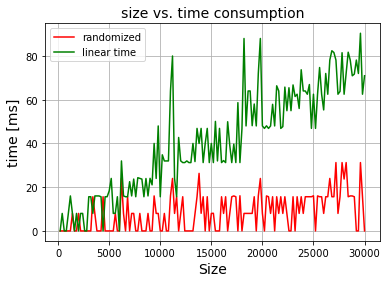

In [16]:
# show the results as Line chart
plt.plot(size, timeRandom, color='red',)
plt.title('size vs. time consumption', fontsize=14)
plt.plot(size,timeSM,color="green")
plt.legend(["randomized", "linear time "], loc ="upper left")
plt.xlabel('Size', fontsize=14)

plt.ylabel("time [ms]", fontsize=14)
plt.grid(True)
plt.show()

In [2]:
@logging_time
def Medians(a, p, r):
    """ call quick sort with linear time medians algorithm. """
    return QuickSort(a, p, r)

def QuickSort(a, p, r):
    if p >= r:
        return 
    med = KthSmallest(a, p, r, (r-p+1)//2)
    q = _partition(a, p, r, med)
    
    QuickSort(a, p, q-1)
    QuickSort(a, q+1, r)
    
@logging_time   
def Random(a, p, r):
    """ call quick sort as randomized algorithm. """
    return quick(a, p, r)

def quick(a, p, r):
    if p < r :   
        i = np.random.randint(p, r+1)
        a[r], a[i] = a[i], a[r]
        # randomized partition with pivot as a[r]
        i = p - 1
        for j in range(p, r):
            if a[j] <= a[r]:
                i += 1 
                a[i], a[j] = a[j], a[i]
        a[i+1], a[r] = a[r], a[i+1]
        q = i+1
        quick(a, p, q -1)              
        quick(a, q + 1, r)

NameError: name 'logging_time' is not defined

In [1]:
from random import seed
import numpy as np
import copy

sizelist, t1list, t2list=[],[],[] # to stor input sizes and execution times
for SEED in range(100):
    print("seed = {} {}".format(SEED, '='*50))
    n = 250*(SEED+1) # each time increase the input size
    sizelist.append(n)
    a = random.sample(range(1, 10000000), n) # generate values

    test1 = copy.deepcopy(a)
    t1=time.time()
    Medians(test1, 0, n-1)
    t2=time.time()
    t1list.append((t2-t1)*1000)
    test2 = copy.deepcopy(a)
    t1= time.time()
    Random(test2, 0, n-1)
    t2=time.time()
    t2list.append((t2-t1)*1000)
    assert test1 == test2 == sorted(copy.deepcopy(a)), "sanity check: failed."


seed = 0 ==================================================


NameError: name 'random' is not defined

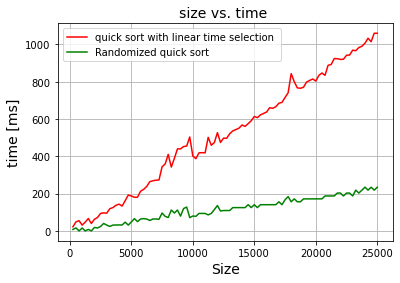

In [15]:
# to show results
plt.plot(sizelist, t1list, color='red',)
plt.title('size vs. time ', fontsize=14)
plt.plot(sizelist,t2list,color="green")
plt.legend(["quick sort with linear time selection ", "Randomized quick sort "], loc ="upper left")
plt.xlabel('Size', fontsize=14)
plt.ylabel("time [ms]", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Quick Sort Code with GUI
# importing time module
import time

# to implement divide and conquer
# data -> the array
# head -> the start index
# tail -> the end index
# drawData -> a reference to drawData function
# timeTick -> the time delay of visualisation 
def partition(data, head, tail,med ,drawData, timeTick): # the partition step with Gui 
    border = head
    for i in range(head,tail+1):
        if data[i] == med: # get the pivot as median 
            data[i], data[tail]= data[tail], data[i]
            break
    pivot = data[tail]

    drawData(data, getColorArray(len(data), head,tail, border, border)) # draw
    time.sleep(timeTick) # step

    for j in range(head, tail):  
        if data[j] < pivot:
            drawData(data, getColorArray(
                len(data), head, tail, border, j, True))
            time.sleep(timeTick)

            data[border], data[j] = data[j], data[border]
            border += 1

        drawData(data, getColorArray(len(data), head,tail, border, j))
        time.sleep(timeTick)

    # swapping pivot with border value
    drawData(data, getColorArray(len(data), head,tail, border, tail, True))
    time.sleep(timeTick)

    data[border], data[tail] = data[tail], data[border]

    return border


# head --> Starting index,
# tail --> Ending index
def quick_sort(data, head, tail,drawData, timeTick): # quick sort with linear time median selection
    if head < tail:
        med = KthSmallest(data, head, tail, (tail-head+1)//2)
        partitionIdx = partition(data, head,tail,med, drawData,timeTick)
        # left partition
        quick_sort(data, head, partitionIdx-1,drawData, timeTick)
        # right partition
        quick_sort(data, partitionIdx+1,tail, drawData, timeTick)
        
def random_quick_sort(data,head,tail,drawData, timeTick): # the randomized quick sort
    border=head
    if head < tail:
        indx= np.random.randint(head, tail+1)
        data[tail],data[indx]= data[indx],data[tail] # randomized pivot selection
        drawData(data, getColorArray(len(data), head,tail, border, border))
        time.sleep(timeTick)
        indx=head-1
        for ind in range(head,tail):
            if data[ind]<= data[tail]:
                indx+=1
                data[indx],data[ind]=data[ind],data[indx]
                drawData(data, getColorArray(len(data), head,tail, border, ind))
                time.sleep(timeTick)
        data[indx+1],data[tail] = data[tail],data[indx+1]
        drawData(data, getColorArray(len(data), head,tail, border, tail,True))
        q = indx+1
        random_quick_sort(data,head,q-1,drawData, timeTick)
        random_quick_sort(data,q+1,tail,drawData, timeTick)

# Function to apply colors to bars while sorting:
# Grey - Unsorted elements
# Blue - Pivot point element
# White - Sorted half/partition
# Red - Starting pointer
# Yellow - Ending pointer
# Green - after all elements are sorted

# assign color representation to elements


def getColorArray(dataLen, head, tail, border,currIdx, isSwaping=False):
    colorArray = []
    for i in range(dataLen):
        # base coloring
        if i >= head and i <= tail:
            colorArray.append('Grey')
        else:
            colorArray.append('White')

        if i == tail:
            colorArray[i] = 'Blue'
        elif i == border:
            colorArray[i] = 'Red'
        elif i == currIdx:
            colorArray[i] = 'Yellow'

        if isSwaping:
            if i == border or i == currIdx:
                colorArray[i] = 'Green'

    return colorArray


In [ ]:
# code for Quick Sort Visualizer
# using Python and Tkinter
# import modules
from tkinter import *
from tkinter import ttk
import random

# initialising root class for Tkinter
root = Tk()
root.title("Quick Sort Visualizer")

# maximum window size
root.maxsize(900, 600)
root.config(bg="Black")

select_alg = StringVar()
data = []

# function to generate the data values
# by accepting a given range
def generate():

    global data

    # minval : minimum value of the range
    minval = int(minEntry.get())

    # maxval : maximum value of the range
    maxval = int(maxEntry.get())

    # sizeval : number of data
    # values/bars to be generated
    sizeval = int(sizeEntry.get())

    # creating a blank data list which will
    # be further filled with random data values
    # within the entered range
    data = []
    for _ in range(sizeval):
        data.append(random.randrange(minval, maxval+1))

    drawData(data, ['Red' for x in range(len(data))])

# function to create the data bars
# by creating a canvas in Tkinter
def drawData(data, colorlist):
    canvas.delete("all")
    can_height = 380
    can_width = 550
    x_width = can_width/(len(data) + 1)
    offset = 30
    spacing = 10
    # normalizing data for rescaling real-valued
    # numeric data within the
    # given range
    normalized_data = [i / max(data) for i in data]

    for i, height in enumerate(normalized_data):
        # top left corner
        x0 = i*x_width + offset + spacing
        y0 = can_height - height*340

        # bottom right corner
        x1 = ((i+1)*x_width) + offset
        y1 = can_height

        # data bars are generated as Red
        # colored vertical rectangles
        canvas.create_rectangle(x0, y0, x1, y1,fill=colorlist[i])
        canvas.create_text(x0+2, y0, anchor=SE,text=str(data[i]))
    root.update_idletasks()

# function to initiate the sorting
# process by calling the extension code
def start_algorithm():
    global data

    if not data:
        return

    if (algmenu.get() == 'Quick Sort with Linear median selection'):
        quick_sort(data, 0, len(data)-1, drawData, speedbar.get())
        drawData(data, ['Green' for x in range(len(data))])
    if (algmenu.get() == "Randomized Quick Sort"):
        random_quick_sort(data, 0, len(data)-1, drawData, speedbar.get())
        drawData(data, ['Green' for x in range(len(data))])


# creating main user interface frame
# and basic layout by creating a frame
Mainframe = Frame(root, width=600, height=200, bg="Grey")
Mainframe.grid(row=0, column=0, padx=10, pady=5)

canvas = Canvas(root, width=600, height=380, bg="Grey")
canvas.grid(row=1, column=0, padx=10, pady=5)

# creating user interface area in grid manner
# first row components
Label(Mainframe, text="ALGORITHM",bg='Grey').grid(row=0, column=0,padx=5, pady=5,sticky=W)

# algorithm menu for showing the
# name of the sorting algorithm
algmenu = ttk.Combobox(Mainframe,textvariable=select_alg,values=["Quick Sort with Linear median selection","Randomized Quick Sort"])
algmenu.grid(row=0, column=1, padx=5, pady=5)
algmenu.current(0)

# creating Start Button to start
# the sorting visualization process
Button(Mainframe, text="START",bg="Blue",command=start_algorithm).grid(row=1,column=3,padx=5,pady=5)

# creating Speed Bar using scale in Tkinter
speedbar = Scale(Mainframe, from_=0.10,to=2.0, length=100, digits=2,resolution=0.2, orient=HORIZONTAL,label="Select Speed")
speedbar.grid(row=0, column=2,padx=5, pady=5)

# second row components
# sizeEntry : scale to select
# the size/number of data bars
sizeEntry = Scale(Mainframe, from_=3,to=30, resolution=1,orient=HORIZONTAL,label="Size")
sizeEntry.grid(row=1, column=0,padx=5, pady=5)

# minEntry : scale to select the
# minimum value of data bars
minEntry = Scale(Mainframe, from_=0,to=10, resolution=1,orient=HORIZONTAL,label="Minimum Value")
minEntry.grid(row=1, column=1,padx=5, pady=5)

# maxEntry : scale to select the
# maximum value of data bars
maxEntry = Scale(Mainframe, from_=10,to=100, resolution=1,orient=HORIZONTAL,label="Maximum Value")
maxEntry.grid(row=1, column=2,padx=5, pady=5)

# creating generate button
Button(Mainframe, text="Generate",bg="Red", command=generate).grid(row=0,column=3,padx=5,pady=5)

# to stop automatic window termination
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/lod_97s/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/zg/jv6lh3x147g1x35dbrjcrvcm0000gn/T/ipykernel_1546/1221857383.py", line 82, in start_algorithm
    quick_sort(data, 0, len(data)-1, drawData, speedbar.get())
NameError: name 'quick_sort' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/lod_97s/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/zg/jv6lh3x147g1x35dbrjcrvcm0000gn/T/ipykernel_1546/1221857383.py", line 82, in start_algorithm
    quick_sort(data, 0, len(data)-1, drawData, speedbar.get())
NameError: name 'quick_sort' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/lod_97s/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self